## 1. Find missing values (*)

- These are introductory exercises in Pandas with focus in syntax, indexing, data selection, missing data, aggregations, visualizations and data

----------------------
&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame


&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns
```

In [1]:
import pandas as pd
import seaborn as sns # för DataFrames
import numpy as np

df = pd.read_csv("../Data/student-mat-missing-data.csv")

df.head(10) # Plockar ut 10 första

# gets some initial info
# might want to remove unnamed: 0 column
# might drop the index in the df because we make an index auto when we open as df

### Good practice to think about when working with datasets ###
# How big of a dataset am I working with?
# How does the dataset look like?
# What kind of variables are in the dataset?

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
5,5,GP,M,16.0,U,LE3,T,4,3,services,...,5.0,4.0,2.0,1,2,5.0,10.0,15,15,15
6,6,GP,M,16.0,U,LE3,T,2,2,other,...,4.0,4.0,4.0,1,1,3.0,0.0,12,12,11
7,7,GP,F,17.0,U,GT3,A,4,4,other,...,4.0,1.0,4.0,1,1,1.0,6.0,6,5,6
8,8,GP,M,15.0,U,LE3,A,3,2,services,...,4.0,2.0,2.0,1,1,1.0,0.0,16,18,19
9,9,GP,M,15.0,U,GT3,T,3,4,other,...,5.0,5.0,1.0,1,1,5.0,0.0,14,15,15


In [2]:
df.tail() # Returns the last rows

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10
394,394,MS,M,19.0,U,LE3,T,1,1,other,...,3.0,2.0,3.0,3,3,5.0,5.0,8,9,9


In [3]:
df.columns  # Ser vad vi har för kolumns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.shape # Dataset has 395 rows and 34 columns

(395, 34)

In [5]:
df.duplicated()  # Ser om något upprepar sig. Inget är duplerat which is great, good, wonderful

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

In [6]:
df.info()  
# Vi kan se att kolumn 3(381 filled), 4(390 filled) saknar values (missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [7]:
# print(df.isnull().sum()) 

# Ser hur många NaN vi har på age och address

In [8]:
print(df['age'].isna().sum())  # ser hur många NaN vi har på "age"
print(df['address'].isna().sum()) # ser hur många NaN vi har på "address"

14
5


------------------
&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

In [ ]:
# Done, is in the folder "Functions" -> data_utils.py -> plot_null_columns

------------------
&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

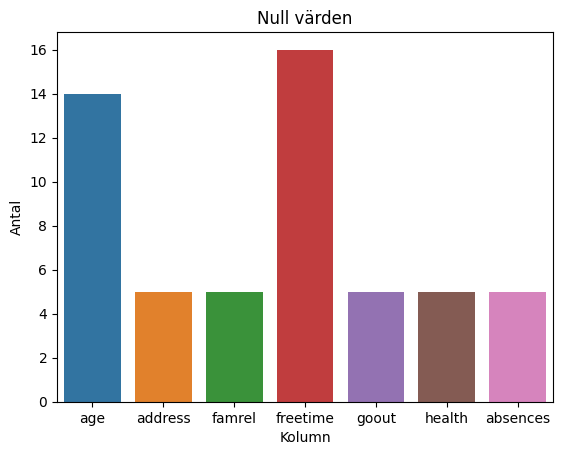

In [25]:
import sys
sys.path.append("../Functions/data_utils.py")

from data_utils import plot_null_columns

plot_null_columns(df)

-------------
&nbsp; e) Find all rows where the freetime is NaN.   

In [30]:
df[df["freetime"].isnull()]   # man kan också loca den genom att skriva df.loc[df["freetime"].isnull()]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


----------------
&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

In [37]:
print(df[df["freetime"].isnull()])
print(df[df["age"].isnull()])

     Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu  \
87           87     GP   F  15.0       U     GT3       T     4     2   
99           99     GP   F  16.0       U     GT3       T     4     3   
130         130     GP   F  15.0       R     GT3       T     3     4   
149         149     GP   M  15.0       U     LE3       A     2     1   
151         151     GP   M  16.0       U     LE3       T     2     1   
160         160     GP   M   NaN     NaN     LE3       T     2     1   
191         191     GP   F   NaN     NaN     GT3       T     1     1   
257         257     GP   M  19.0       U     LE3       A     4     3   
276         276     GP   F   NaN     NaN     GT3       A     3     2   
293         293     GP   F   NaN     NaN     LE3       T     3     1   
308         308     GP   M  19.0       R     GT3       T     3     3   
330         330     GP   M  18.0       U     LE3       T     2     2   
343         343     GP   F  17.0       U     GT3       A     2  

-----------------
&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

In [79]:
#sorted = df.isnull().sum()
#sorted
import matplotlib.pyplot as plt

df2 = df.isnull().sum("columns").value_counts()
df3 = (df2[df2.index > 1] / sum(df2))
value = float(df3.values)

print(f"These rows constitutes {round(values, 4)} of the dataset")

These rows constitutes 0.0127 of the dataset


<AxesSubplot: >

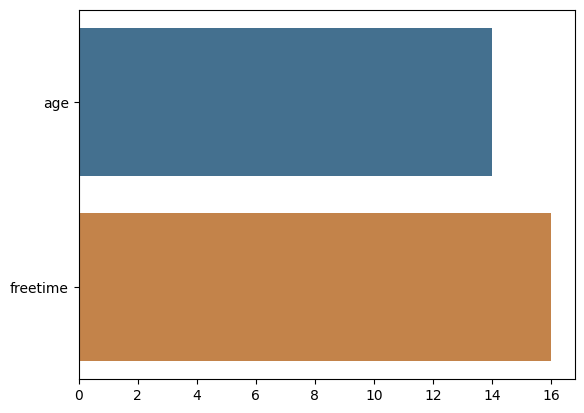

In [110]:
#df_age_freetime = df[["age", "freetime"]]

#sns.barplot(x = df_age_freetime.isnull().sum().values, y = df_age_freetime.isnull().sum().index, saturation=0.5)